<a href="https://colab.research.google.com/github/KirillNU/Internship_HW_Pro/blob/master/KBarannik_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F%2C_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9D%D0%A1_%7C_%D0%94%D0%97_Lite_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Заполните сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

# Шаблон ноутбука

##Импорт библиотек

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential  

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 

# Утилиты для to_categorical()
from tensorflow.keras import utils   

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta 

# Библиотека для работы с массивами
import numpy as np 

# Библиотека для работы с таблицами
import pandas as pd     

# Отрисовка графиков
import matplotlib.pyplot as plt     

# Связь с google-диском
from google.colab import files   

# Предварительная обработка данных
from sklearn import preprocessing        

# Разделение данных на выборки
from sklearn.model_selection import train_test_split    

# Для загрузки датасета
from keras.datasets import fashion_mnist                   

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

##Описание базы

###База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

###Вывод примеров

In [ ]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()   

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


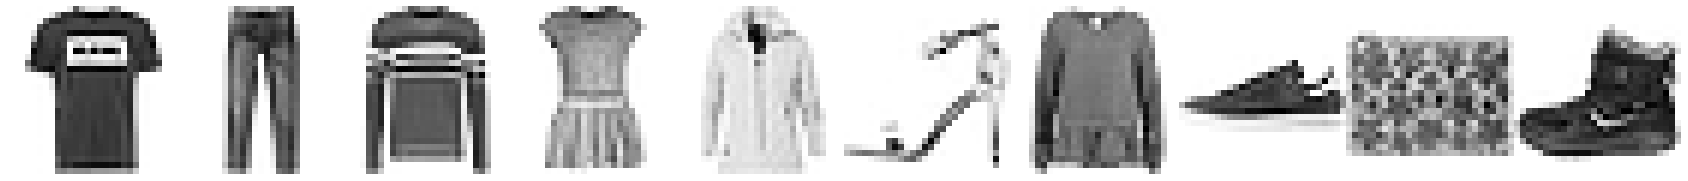

In [ ]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])  

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)  

# Создание поля для изображения
plt.figure(figsize=(30, 6))   

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys')    

# Без сетки
#plt.grid(False) 

# Без осей
plt.axis('off')  

# Вывод результата
plt.show() 

In [ ]:
# Ваше решение
CLASS_COUNT = 10
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
# x_train = x_train.reshape(x_train.shape[0], 784)
# x_test = x_test.reshape(x_test.shape[0], 784)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


Функция создания модели с 3-мя слоями, количеством нейронов, функцией активации, 0 - 2 drop слоями и параметром для drop

Функция создания модели с 3 слоями Dense и управления количестовм нейронов в первых 2-х слоях - l1_neuron, l2_neuron, заданием функции активации f_activ в первых 2-х слоях, добавлением Dropout слоёв для первых 2-х слоёв - drops и добавлением BatchNormalization слоёв - batch : 0 - BatchNormalization не добавляется, 1 - BatchNormalization перед в первым слой, 2 - BatchNormalization в первый и второй слой, если есть слои Dropout.
Параметры batch_size и epoch  меняются при обучении модели

In [ ]:
def create_model_drop_batch(l1_neuron, l2_neuron, f_activ, drops, batch):
    model = Sequential()
    if drops == 0:
      if batch == 0 or batch == 2:
        model.add(Dense(l1_neuron, input_dim = 784, activation = f_activ))
        model.add(Dense(l2_neuron, activation = f_activ))
      else:
        model.add(BatchNormalization(input_dim = 784))
        model.add(Dense(l1_neuron, input_dim = 784, activation = f_activ))
        model.add(Dense(l2_neuron, activation = f_activ))
    elif drops == 1:
      if batch == 0:
        model.add(Dense(l1_neuron, input_dim = 784, activation = f_activ))
        model.add(Dropout(0.3))
        model.add(Dense(l2_neuron, activation = f_activ))
      elif batch == 1:
        model.add(BatchNormalization(input_dim = 784))
        model.add(Dense(l1_neuron, input_dim = 784, activation = f_activ))
        model.add(Dropout(0.3))
        model.add(Dense(l2_neuron, activation = f_activ))
      elif batch == 2:
        model.add(BatchNormalization(input_dim = 784))
        model.add(Dense(l1_neuron, input_dim = 784, activation = f_activ))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        model.add(Dense(l2_neuron, activation = f_activ))    
    elif drops == 2:
      if batch == 0:
        model.add(Dense(l1_neuron, input_dim = 784, activation = f_activ))
        model.add(Dropout(0.3))
        model.add(Dense(l2_neuron, activation = f_activ))
        model.add(Dropout(0.3))
      elif batch == 1:
        model.add(BatchNormalization(input_dim = 784))
        model.add(Dense(l1_neuron, input_dim = 784, activation = f_activ))
        model.add(Dropout(0.3))
        model.add(Dense(l2_neuron, activation = f_activ))
        model.add(Dropout(0.3))
      elif batch == 2:
        model.add(BatchNormalization(input_dim = 784))
        model.add(Dense(l1_neuron, input_dim = 784, activation = f_activ))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        model.add(Dense(l2_neuron, activation = f_activ))
        model.add(Dropout(0.3))

    model.add(Dense(CLASS_COUNT, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01),
                  metrics=['accuracy'])
    print(model.summary())
    return model

Функция печати графика ошибки модели

In [ ]:
def print_graph(model):
    plt.plot(model.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
    plt.plot(model.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()

    plt.plot(model.history['loss'], 
            label='Ошибка на обучающем наборе')
    plt.plot(model.history['val_loss'], 
            label='Ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()

In [ ]:
model_1 = create_model_drop_batch(2000, 200, 'relu', 2, 0)

In [ ]:
utils.plot_model(model_1, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)

Альтернативный вариант разделения на обучающую и валидационную выборки.

In [ ]:
# model_f = model_1.fit(x_train[:50000],
#                     y_train[:50000],
#                     batch_size=128,
#                     validation_data=(x_train[50000:], y_train[50000:]),
#                     epochs=120,
#                     verbose=True, shuffle=True)

Графическое отображение результатов обучения.

In [ ]:
print_graph(model_f)

Оценка качества обучения

In [ ]:
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Результаты
1. **Начальная модель без слоёв BatchNormalization и Dropou**t 

model_1 = create_model_drop_batch(800, 80, 'relu', 0, 0)
  Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 80)                64080     
                                                                 
 dense_2 (Dense)             (None, 10)                810       
                                                                 
=================================================================
Total params: 692,890
Trainable params: 692,890
Non-trainable params: 0

model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)

Epoch 200/200
540/540 [==============================] - 2s 3ms/step - loss: 0.1522 - accuracy: 0.9486 - val_loss: 1.1369 - val_accuracy: 0.8700

313/313 [==============================] - 1s 2ms/step - loss: 1.2361 - accuracy: 0.8703
Процент верных ответов на тестовых данных: 87.0 %

**Результат эксперимента 1: по графику ошибки наблюдается начало переобучения в районе 20-30 эпохи.**

2. **Добавлени одного слоя Dropout**

model_1 = create_model_drop_batch(800, 80, 'relu', 1, 0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_15 (Dense)            (None, 800)               628000    
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 80)                64080     
                                                                 
 dense_17 (Dense)            (None, 10)                810       
                                                                 
=================================================================
Total params: 692,890
Trainable params: 692,890
Non-trainable params: 0
_________________________________________________________________


model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)

Epoch 200/200
540/540 [==============================] - 2s 3ms/step - loss: 0.2750 - accuracy: 0.9011 - val_loss: 0.4860 - val_accuracy: 0.8803

313/313 [==============================] - 1s 3ms/step - loss: 0.4840 - accuracy: 0.8730
Процент верных ответов на тестовых данных: 87.0 %

**Результат эксперимента 2: по графику ошибки эффект переобучения наблюдается позже по эпохам. Точность модели не меняется.**

3. **Добавление к модели слоя BatchNormalization на входе и отключение слоя Dropout.**

model_1 = create_model_drop_batch(800, 80, 'relu', 0, 1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 800)               628000    
                                                                 
 dense_22 (Dense)            (None, 80)                64080     
                                                                 
 dense_23 (Dense)            (None, 10)                810       
                                                                 
=================================================================
Total params: 696,026
Trainable params: 694,458
Non-trainable params: 1,568

model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)

Epoch 200/200
540/540 [==============================] - 2s 3ms/step - loss: 0.5809 - accuracy: 0.8310 - val_loss: 2.0119 - val_accuracy: 0.7832

313/313 [==============================] - 1s 2ms/step - loss: 5.0849 - accuracy: 0.7786
Процент верных ответов на тестовых данных: 78.0 %

**Результат эксперимента 3: по графику ошибки эффект переобучения заметно не меняется. Точность модели ухудшилась.**

4. **Добавление к модели с BatchNormalization на входе и одного слоя Dropout.**

model_1 = create_model_drop_batch(800, 80, 'relu', 1, 1)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 batch_normalization_5 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_27 (Dense)            (None, 800)               628000    
                                                                 
 dropout_3 (Dropout)         (None, 800)               0         
                                                                 
 dense_28 (Dense)            (None, 80)                64080     
                                                                 
 dense_29 (Dense)            (None, 10)                810       
                                                                 
=================================================================
Total params: 696,026
Trainable params: 694,458
Non-trainable params: 1,568

model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)

Epoch 200/200
540/540 [==============================] - 2s 5ms/step - loss: 0.8412 - accuracy: 0.7272 - val_loss: 1.5763 - val_accuracy: 0.7503

313/313 [==============================] - 1s 4ms/step - loss: 0.9406 - accuracy: 0.7457
Процент верных ответов на тестовых данных: 75.0 %

**Результат эксперимента 4: по графику ошибки эффект переобучения заметно не меняется. Точность модели ещё ухудшилась.**

5. **Модель с BatchNormalization на входе и 2 слоя Dropout**

model_1 = create_model_drop_batch(800, 80, 'relu', 2, 1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 batch_normalization_8 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_33 (Dense)            (None, 800)               628000    
                                                                 
 dropout_5 (Dropout)         (None, 800)               0         
                                                                 
 dense_34 (Dense)            (None, 80)                64080     
                                                                 
 dropout_6 (Dropout)         (None, 80)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                810       
                                                                 
=================================================================
Total params: 696,026
Trainable params: 694,458
Non-trainable params: 1,568

model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)

Epoch 200/200
540/540 [==============================] - 2s 4ms/step - loss: 0.8651 - accuracy: 0.7191 - val_loss: 0.8695 - val_accuracy: 0.7405

313/313 [==============================] - 1s 3ms/step - loss: 0.7810 - accuracy: 0.7393
Процент верных ответов на тестовых данных: 74.0 %



**Результат эксперимента 5: по графику ошибки эффект переобучения заметно не меняется. Точность модели ещё более ухудшилась.**

6. **Модель с увеличенным количеством нейронов во входном слое и без BatchNormalization и Dropout**

model_1 = create_model_drop_batch(1000, 80, 'relu', 0, 0)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_39 (Dense)            (None, 1000)              785000    
                                                                 
 dense_40 (Dense)            (None, 80)                80080     
                                                                 
 dense_41 (Dense)            (None, 10)                810       
                                                                 
=================================================================
Total params: 865,890
Trainable params: 865,890
Non-trainable params: 0

model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)

Epoch 200/200
540/540 [==============================] - 2s 4ms/step - loss: 0.1529 - accuracy: 0.9459 - val_loss: 0.9643 - val_accuracy: 0.8822

313/313 [==============================] - 1s 2ms/step - loss: 1.1051 - accuracy: 0.8718
Процент верных ответов на тестовых данных: 87.0 %

**Результат эксперимента 6:  Точность вернулась на уровень эксперимента 1. Также стал заметно увеличение эффекта переобучения.  **

7. **Модель с увеличенным количеством нейронов во входном и внутреннем слоях и без BatchNormalization и Dropout**


model_1 = create_model_drop_batch(1000, 160, 'relu', 0, 0)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_45 (Dense)            (None, 1000)              785000    
                                                                 
 dense_46 (Dense)            (None, 160)               160160    
                                                                 
 dense_47 (Dense)            (None, 10)                1610      
                                                                 
=================================================================
Total params: 946,770
Trainable params: 946,770
Non-trainable params: 0

model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)

Epoch 200/200
540/540 [==============================] - 2s 3ms/step - loss: 0.1602 - accuracy: 0.9422 - val_loss: 0.9836 - val_accuracy: 0.8745

313/313 [==============================] - 1s 2ms/step - loss: 1.2280 - accuracy: 0.8728
Процент верных ответов на тестовых данных: 87.0 %



**Результат эксперимента 7:  Точность и переобучение заметно не изменились по сравнению с экспериментом 6. Но и не ухудшились в сравнении с экспериментами с лушими показателями качества. **

8. **Модель, как в экперименте 7 и BatchNormalization в входном слое**

model_1 = create_model_drop_batch(1000, 160, 'relu', 0, 1)

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_15 (Dense)            (None, 800)               628000    
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 80)                64080     
                                                                 
 dense_17 (Dense)            (None, 10)                810       
                                                                 
=================================================================
Total params: 692,890
Trainable params: 692,890
Non-trainable params: 0

model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)
Epoch 200/200
540/540 [==============================] - 2s 3ms/step - loss: 0.5216 - accuracy: 0.8370 - val_loss: 1.3119 - val_accuracy: 0.8182

313/313 [==============================] - 1s 2ms/step - loss: 3.5330 - accuracy: 0.8118
Процент верных ответов на тестовых данных: 81.0 %

8. **Результат эксперимента 8: Качество модели ухудшилось. И по экспериментам в целом BatchNormalization ухудшает точность модели.**

9. **Модель с увеличенным количеством нейронов в слоях и 2 слоями Dropout.**

model_1 = create_model_drop_batch(2000, 200, 'relu', 2, 0)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_51 (Dense)            (None, 2000)              1570000   
                                                                 
 dropout_9 (Dropout)         (None, 2000)              0         
                                                                 
 dense_52 (Dense)            (None, 200)               400200    
                                                                 
 dropout_10 (Dropout)        (None, 200)               0         
                                                                 
 dense_53 (Dense)            (None, 10)                2010      
                                                                 
=================================================================
Total params: 1,972,210
Trainable params: 1,972,210
Non-trainable params: 0

model_f = model_1.fit(x_train,
                    y_train,
                    batch_size=100,
                    validation_split=0.1,
                    epochs=200,
                    verbose=True, shuffle=True)

Epoch 200/200
540/540 [==============================] - 2s 3ms/step - loss: 0.4970 - accuracy: 0.8196 - val_loss: 0.7659 - val_accuracy: 0.8585
313/313 [==============================] - 1s 2ms/step - loss: 0.7347 - accuracy: 0.8492
Процент верных ответов на тестовых данных: 85.0 %

9.**Результат эксперимента 9: При уменьшении точности модели уменьшается эффект переобучения.**


**Общий вывод: продолжать эксперименты в направлении увеличение числа нейронов и изменения параметров batch size и количества epoch.**